# Latest report

In [1]:
source("common.R")

levels <- c("Activity not limited", "Activity limited a little", "Activity limited a lot")

df_last <-
  read_csv("data/tidy_ons_longcovid.csv", show_col_types = F) %>%
  arrange(`Week Ending Date`)%>%
  mutate(`Impact on daily activity` = factor(`Impact on daily activity`, levels = levels)) %>%  
  filter(`Week Ending Date`==last(`Week Ending Date`))

df_last%>%
  head

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



Impact on daily activity,Domain,Group,Estimate,Lower 95% confidence limit,Upper 95% confidence limit,filename,Unit,Week Ending Date,midpoint_date
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<date>,<date>
Activity not limited,All people,All people,392,370,413,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19
Activity not limited,Duration since first (suspected) coronavirus infection,4 to <12 weeks,17,13,21,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19
Activity not limited,Duration since first (suspected) coronavirus infection,12 to <26 weeks,25,20,31,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19
Activity not limited,Duration since first (suspected) coronavirus infection,26 to <39 weeks,28,23,33,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19
Activity not limited,Duration since first (suspected) coronavirus infection,39 to <52 weeks,32,27,38,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19
Activity not limited,Duration since first (suspected) coronavirus infection,52 to <78 weeks,104,93,116,data/longcovid1920230330accessible.xlsx,Thousands,2023-03-05,2023-02-19


# By Index of Multiple Deprivation

Warning message in geom_text(aes(label = paste0(Estimate, "%"), color = `Impact on daily activity`), :
“Ignoring unknown parameters: `fill`”


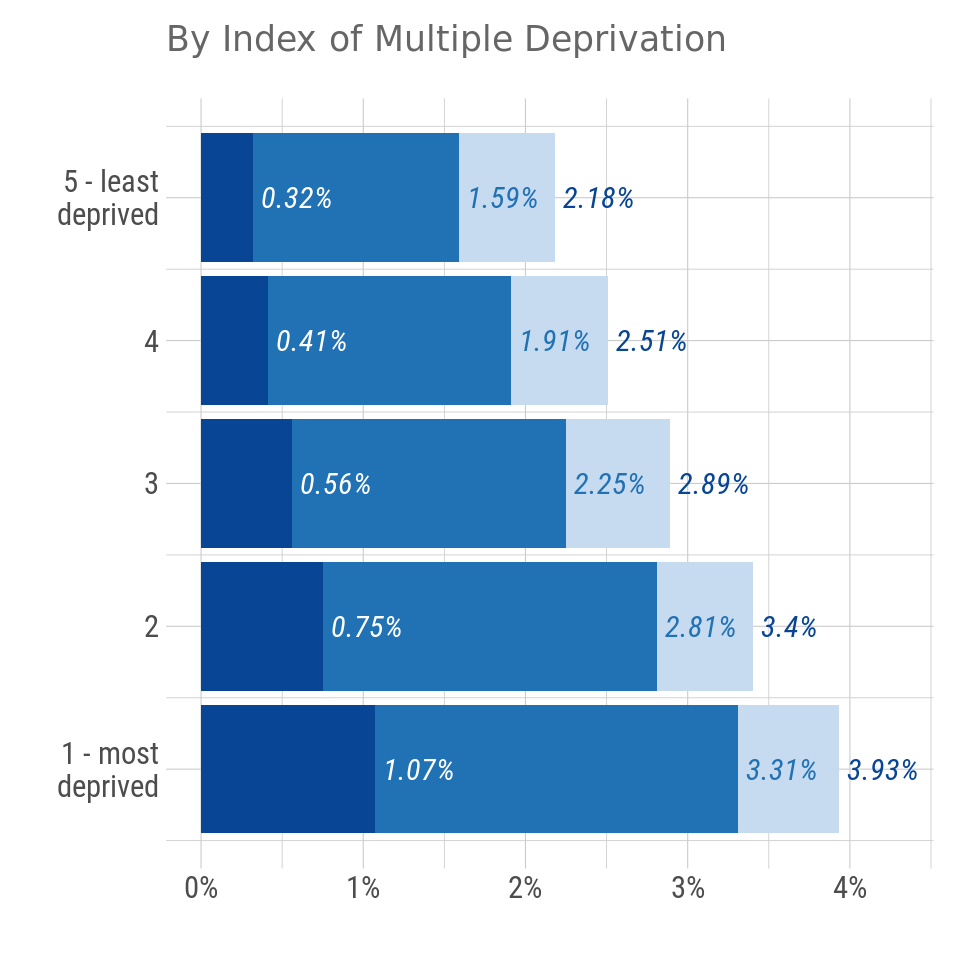

In [2]:
s = 1.25
options(repr.plot.width = s*4, repr.plot.height = s*4, repr.plot.res = 240/s)

df_pos <-
  df_last %>%
  filter(Domain =="Index of Multiple Deprivation quintile group") %>%
  mutate(group = parse_number(Group)) %>%
  select(group, Estimate, `Impact on daily activity`) %>%
  spread(`Impact on daily activity`, Estimate)%>%
  mutate(`Activity limited a little` = `Activity limited a little` + `Activity limited a lot`)%>%
  mutate(`Activity not limited` = `Activity not limited` + `Activity limited a little`)%>%
  gather("Impact on daily activity", "Estimate", -group)

g1 <-
  df_last %>%
  filter(Domain =="Index of Multiple Deprivation quintile group") %>%
  mutate(group = parse_number(Group)) %>%
  ggplot(aes(x = group, y = Estimate, fill = `Impact on daily activity`)) +
  labs(subtitle = "By Index of Multiple Deprivation", x = "", y = "") +
  geom_col() +
  scale_fill_manual(values = c('#C6DBEF',  '#2171B5', '#084594')) +
  scale_color_manual(values = c('#2171B5', 'white',  '#084594')) +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5),
                     labels = c("1 - most\ndeprived", "2", "3", "4", "5 - least\ndeprived")) +
  coord_flip(ylim = c(0, 4.3)) +
  geom_text(aes(label = paste0(Estimate, "%"), color = `Impact on daily activity`),
            data = df_pos, fill = "white", nudge_y = .05, size = 4,
            family = "Roboto Condensed", fontface=3, hjust = 0) +
  theme(legend.position = "none")

g1

# By variant

In [3]:
df_variant <-
  df_last%>%
  filter(Domain=="Main variant of SARS-CoV-2 at time of first (suspected) coronavirus infection")%>%
  filter(Unit=="Thousands") %>%
  group_by(Group, `Impact on daily activity`)%>%
  summarise(Estimate = sum(Estimate, na.rm = T), .groups = "drop")

df_variant%>%
  spread(`Impact on daily activity`, Estimate)

Group,Activity not limited,Activity limited a little,Activity limited a lot
<chr>,<dbl>,<dbl>,<dbl>
Alpha,47,146,54
Delta,95,179,53
Omicron,137,431,130
Pre-Alpha,100,319,127
Unknown period,13,32,17


In [4]:
df_variant_pos <-
  df_last %>%
  filter(Group!="Unknown period")%>%
  filter(Domain=="Main variant of SARS-CoV-2 at time of first (suspected) coronavirus infection")%>%
  filter(Unit=="Thousands") %>%
  select(Group, Estimate, `Impact on daily activity`) %>%
  spread(`Impact on daily activity`, Estimate)%>%
  mutate(`Activity limited a little` = `Activity limited a little` + `Activity limited a lot`)%>%
  mutate(`Activity not limited` = `Activity not limited` + `Activity limited a little`)%>%
  gather("Impact on daily activity", "Estimate", -Group)

df_variant_pos%>%
  spread(`Impact on daily activity`, Estimate)

Group,Activity limited a little,Activity limited a lot,Activity not limited
<chr>,<dbl>,<dbl>,<dbl>
Alpha,200,54,247
Delta,232,53,327
Omicron,561,130,698
Pre-Alpha,446,127,546


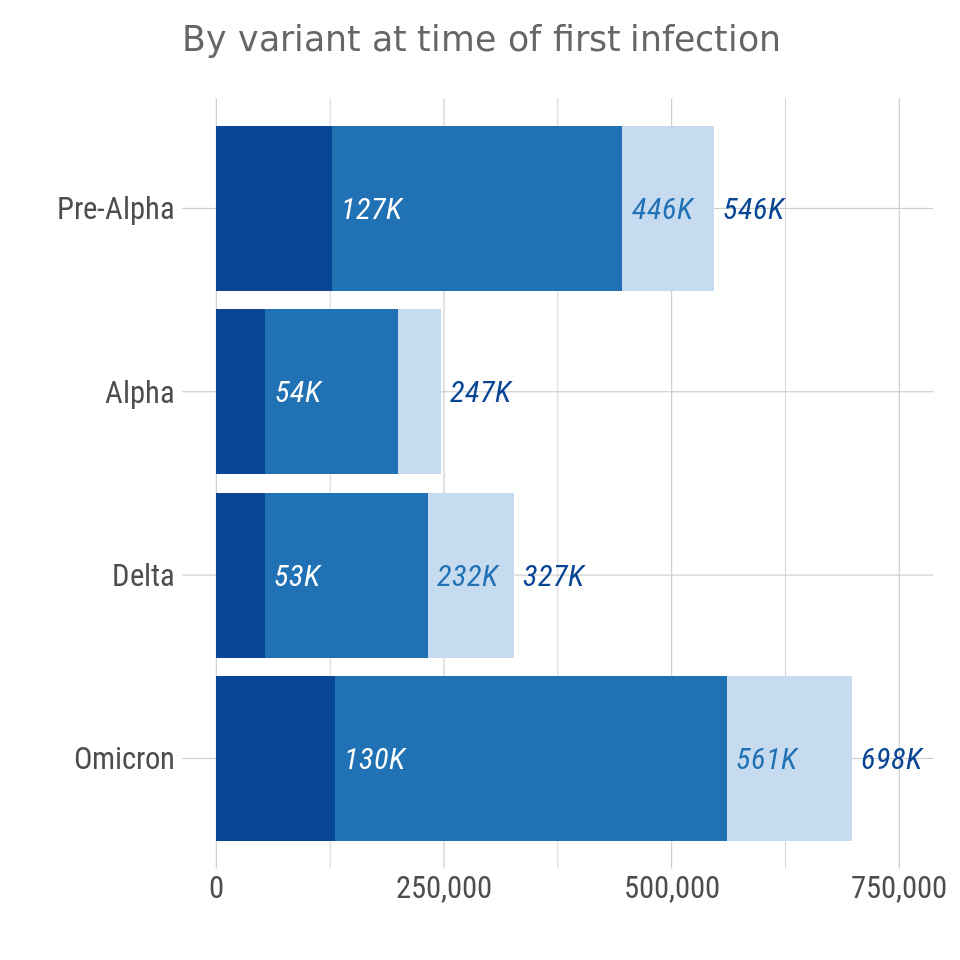

In [5]:
s = 1.25
options(repr.plot.width = s*4, repr.plot.height = s*4, repr.plot.res = 240/s)

g2 <- 
  df_variant%>%
  filter(Group!="Unknown period")%>%
  mutate(Group = factor(Group, levels = rev(c("Pre-Alpha", "Alpha", "Delta", "Omicron")))) %>%  
  ggplot(aes(x = Group, y = Estimate*1000, fill = `Impact on daily activity`)) +
  labs(subtitle = "By variant at time of first infection", x = "", y = "") +
  geom_col() +
  geom_text(data = df_variant_pos, aes(label = ifelse(Group=="Alpha" & `Impact on daily activity`=="Activity limited a little", "", paste0(Estimate, "K")), color = `Impact on daily activity`), hjust = 0,
            nudge_y = 10000,
            size = 4,
            family = "Roboto Condensed", 
            fontface=3,) +
  scale_y_continuous(labels = scales::comma, breaks = seq(0, 1000000, 250000)) +
  scale_fill_manual(values = c('#C6DBEF',  '#2171B5', '#084594')) +
  scale_color_manual(values = c('#2171B5', 'white',  '#084594')) +
  coord_flip(ylim = c(0, 750000)) +
  theme(legend.position = "none")
g2

# By sex

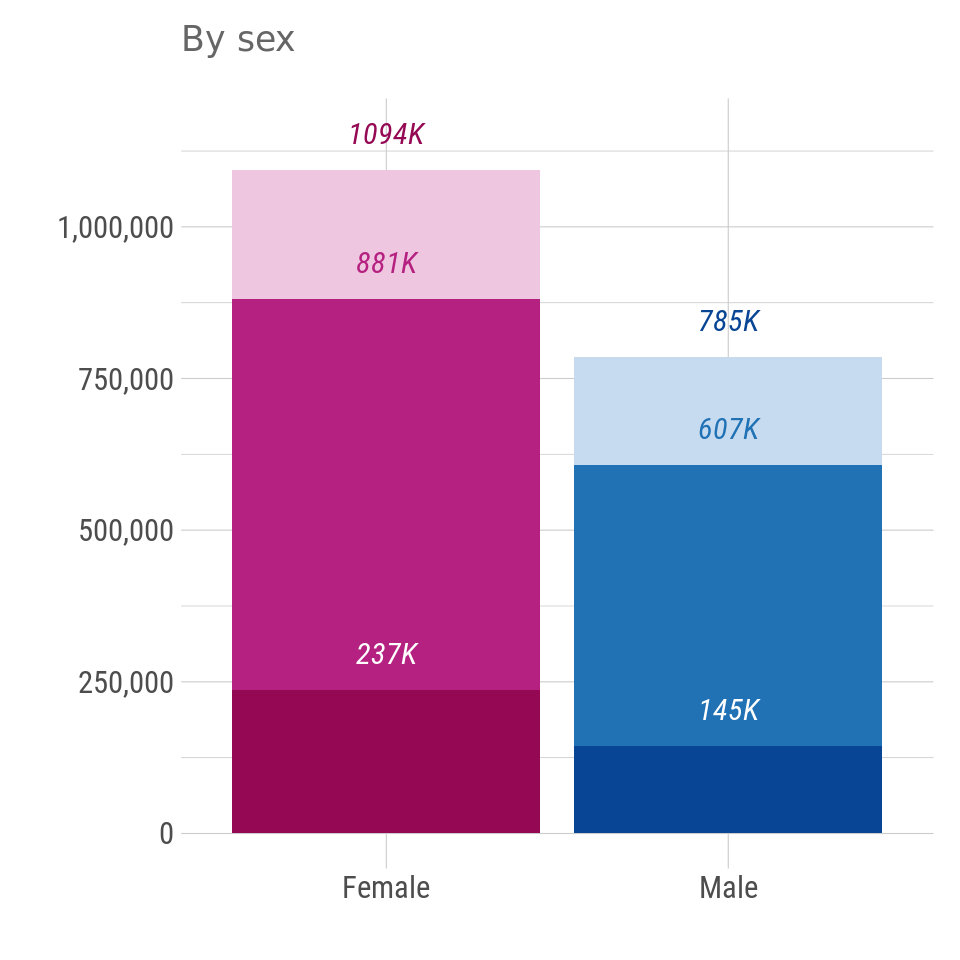

In [6]:
s = 1.25
options(repr.plot.width = s*4, repr.plot.height = s*4, repr.plot.res = 240/s)

df_sex <-
  df_last%>%
  filter(Unit=="Thousands") %>%
  filter(Domain=="Sex")%>%
  select(Group, `Impact on daily activity`, Unit, Estimate)

df_sex_pos <-
  df_sex %>%
  select(Group, Estimate, `Impact on daily activity`) %>%
  spread(`Impact on daily activity`, Estimate)%>%
  mutate(`Activity limited a little` = `Activity limited a little` + `Activity limited a lot`)%>%
  mutate(`Activity not limited` = `Activity not limited` + `Activity limited a little`)%>%
  gather("Impact on daily activity", "Estimate", -Group)

g3 <-
  df_sex%>%
  ggplot(aes(x = Group, y = Estimate*1000, fill = interaction(`Impact on daily activity`, Group))) +
  labs(subtitle = "By sex", x = "", y = "") +
  geom_col() +
  geom_text(data = df_sex_pos, aes(label = paste0(Estimate, "K"), color = interaction(`Impact on daily activity`, Group)),
            nudge_y = 60000,
            size = 4,
            family = "Roboto Condensed", 
            fontface=3) +
  scale_y_continuous(labels = scales::comma, breaks = seq(0, 1000000, 250000)) +
  scale_fill_manual(values = c('#EFC6DF', '#B52181',  '#940854', '#C6DBEF',  '#2171B5', '#084594')) +
  scale_color_manual(values = c('#B52181', 'white',  '#940854', '#2171B5', 'white',  '#084594')) +
  #coord_flip(ylim = c(0, NA)) +
  theme(legend.position = "none")
g3

# By age

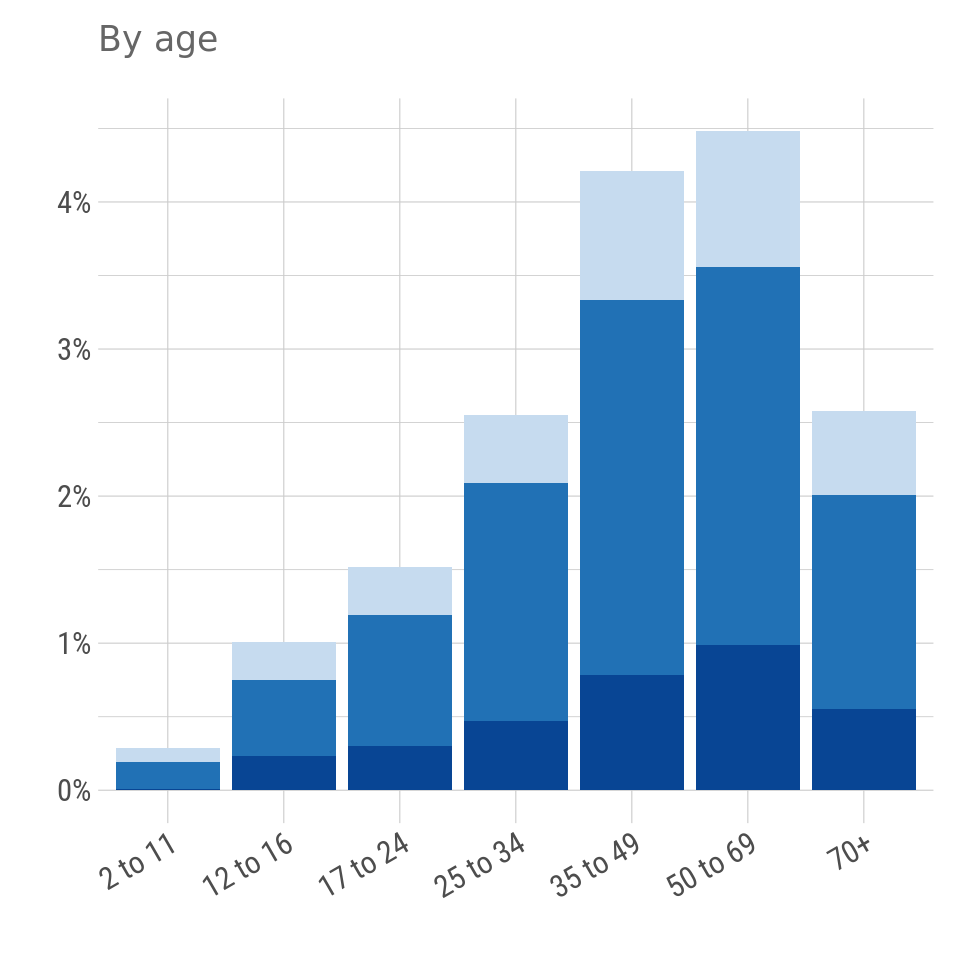

In [8]:
s = 1.25
options(repr.plot.width = s*4, repr.plot.height = s*4, repr.plot.res = 240/s)

g6 <- 
  df_last%>%
  filter(Domain=="Age group")%>%
  filter(Unit!="Thousands")%>%
  select(Group, `Impact on daily activity`, Estimate)%>%
  ggplot(aes(x = reorder(Group, parse_number(Group)), y = Estimate, 
             fill = `Impact on daily activity`)) + 
  labs(subtitle = "By age",
       fill = "", x = "", y = "") +
  geom_col()  +
  scale_x_discrete(guide = guide_axis(angle = 30)) +
  scale_fill_manual(values = c('#C6DBEF',  '#2171B5', '#084594')) +
  scale_y_continuous(labels = scales::percent_format(scale = 1), breaks = seq(0, 10, 1))+
  theme(legend.position = "none")
g6

# By duration since first infection

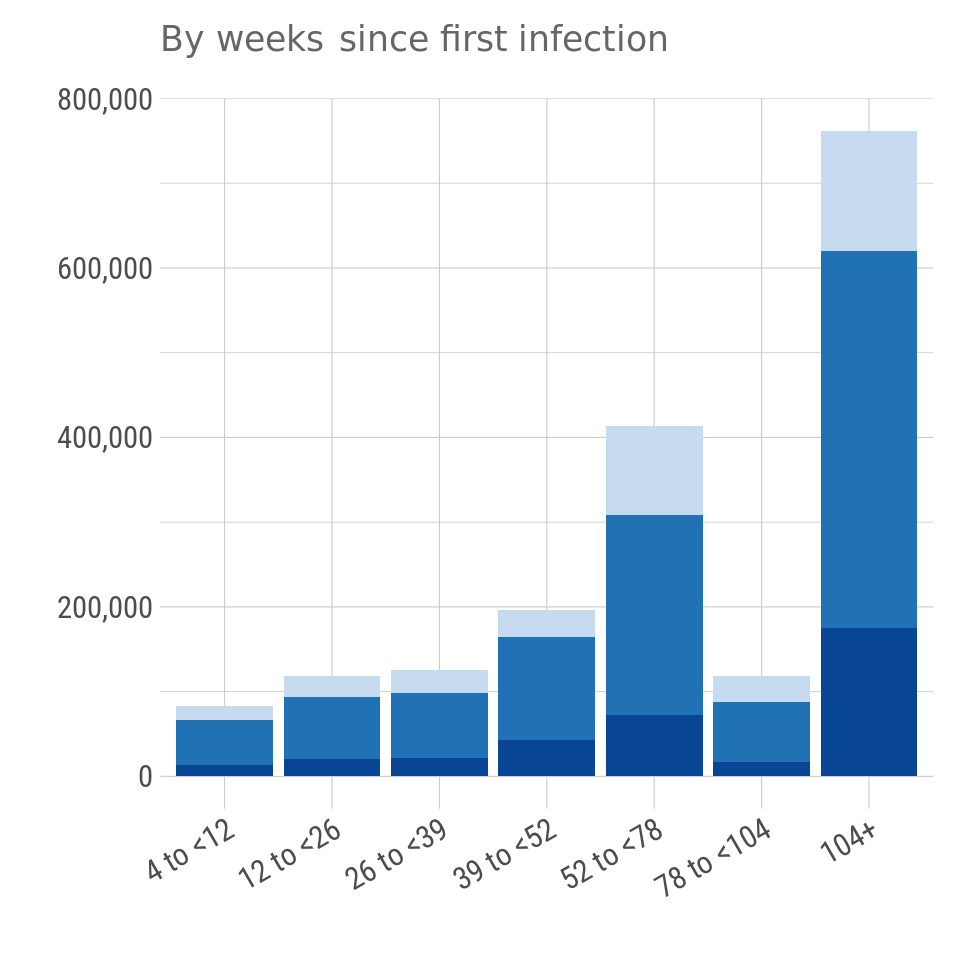

In [52]:
s = 1.25
options(repr.plot.width = s*4, repr.plot.height = s*4, repr.plot.res = 240/s)

g5 <-
  df_last%>%
  filter(Unit=="Thousands") %>%
  filter(Domain == "Duration since first (suspected) coronavirus infection")%>%
  filter(Group != "Unknown duration")%>%
  select(Group, `Impact on daily activity`, Estimate)%>%
  mutate(Group = gsub(" weeks", "", Group))%>%
  ggplot(aes(x = reorder(Group, parse_number(Group)), y = Estimate*1000, fill = `Impact on daily activity`)) +
  labs(subtitle = "By weeks since first infection", x = "", y = "") +
  geom_col() +
  scale_fill_manual(values = c('#C6DBEF',  '#2171B5', '#084594')) +
  scale_y_continuous(labels = scales::comma) +
  scale_x_discrete(guide = guide_axis(angle = 30)) +
  theme(legend.position = "none")
#   theme(legend.position = c(0.75, .75),
#         legend.margin=margin(t = -.5, unit='cm'),
#         legend.box.background = element_rect(fill = alpha("white", 0.7),
#             colour = NA))
g5

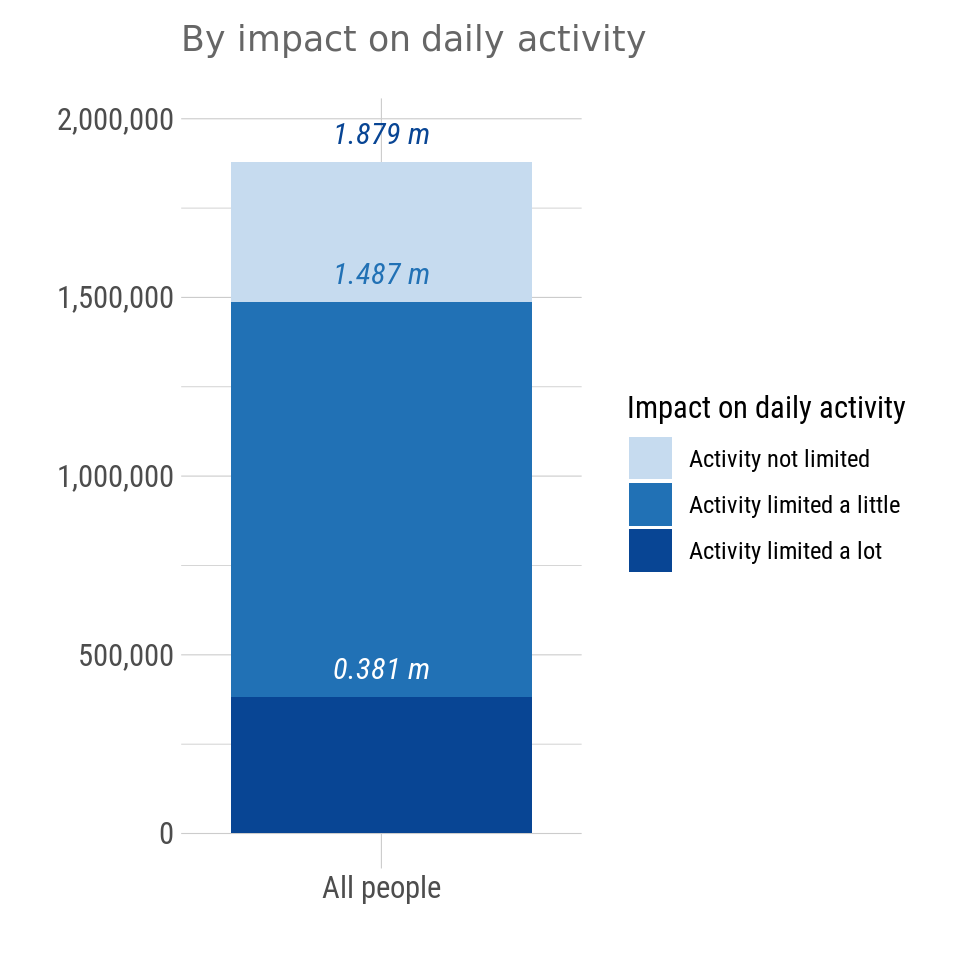

In [48]:
s = 1.25
options(repr.plot.width = s*4, repr.plot.height = s*4, repr.plot.res = 240/s)

df_all <-
  df_last%>%
  filter(Unit=="Thousands") %>%
  filter(Domain == "All people")%>%
  select(Group, `Impact on daily activity`, Estimate)

df_all_pos <-
  df_all %>%
  select(Group, Estimate, `Impact on daily activity`) %>%
  spread(`Impact on daily activity`, Estimate)%>%
  mutate(`Activity limited a little` = `Activity limited a little` + `Activity limited a lot`)%>%
  mutate(`Activity not limited` = `Activity not limited` + `Activity limited a little`)%>%
  gather("Impact on daily activity", "Estimate", -Group)

g8 <-
  df_all %>%
  ggplot(aes(x = Group, y = Estimate*1000, fill = `Impact on daily activity`)) +
  labs(subtitle = "By impact on daily activity", x = "", y = "") +
  geom_col() +
  geom_text(data = df_all_pos, aes(label = paste(Estimate/1000, "m"), color = `Impact on daily activity`),
            nudge_y = 80000,
            size = 4,
            family = "Roboto Condensed", 
            fontface=3, show.legend = F) +
  scale_fill_manual(values = c('#C6DBEF',  '#2171B5', '#084594')) +
  scale_color_manual(values = c('#2171B5', 'white',  '#084594')) +
  scale_y_continuous(labels = scales::comma)
g8

# Composite

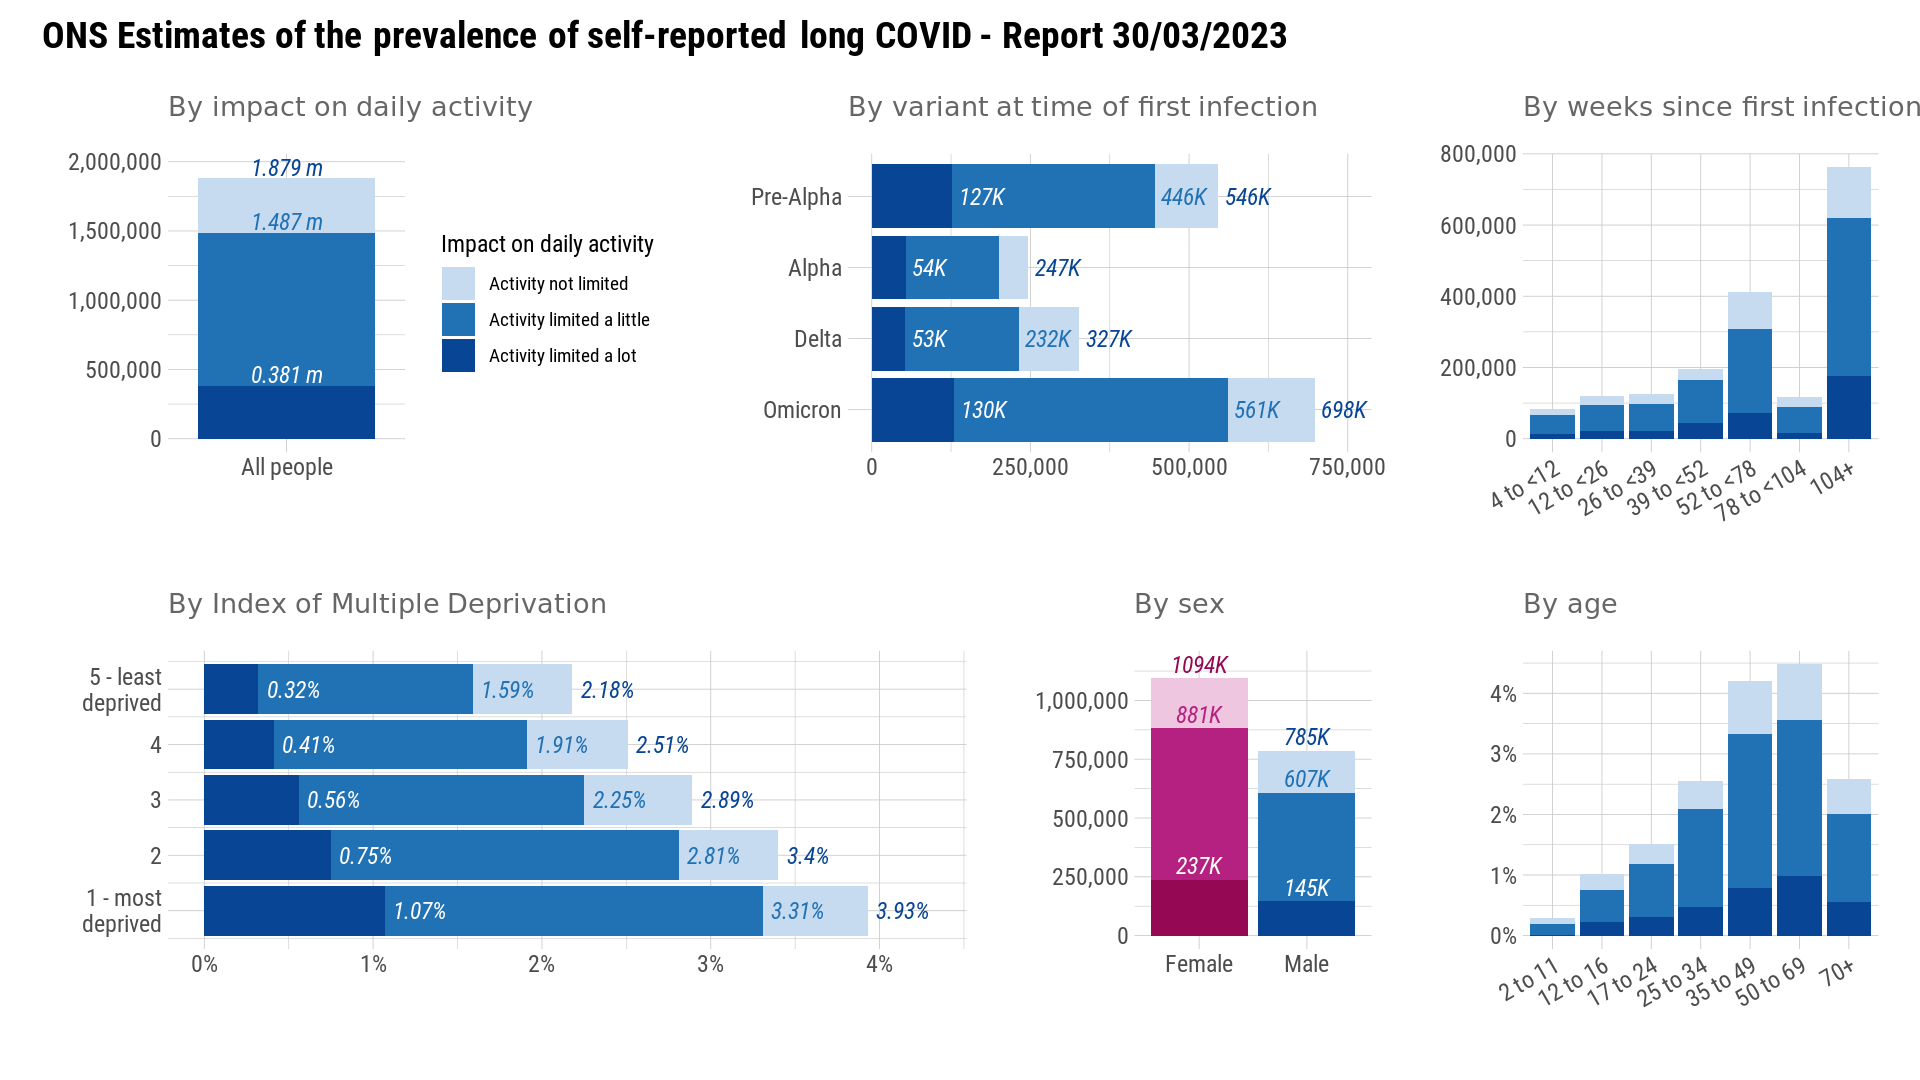

In [54]:
library(patchwork)

s = 1.6
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

g1 + g2 + g3 + g8 + g5 + g6 +
 plot_annotation(
  title = 'ONS Estimates of the prevalence of self-reported long COVID - Report 30/03/2023') +
  plot_layout(design ="44222555
                       11133666")+
  savePlot("ONS_LC_snapshot")